I - Introduction:

This part does a light study of the dataset chosen to build our AI model.
Our goal with the AI is to offer a "morgage calculator". A tool to help the users of the HomeFinder Service to have some insights regarding the obtention of a loan. As the AI will try to determine if the loan will be accepted or not.

Our dataset is 614 rows long with the following features:
- Gender: The Gender of the applicant (Male/Female)
- Married: If the applicant is Married (Yes/No)
- Dependents: The number of persons that financialy depend on the applicant (aka: childs), on a scale from 0 to 3+
- Education: The education level of the applicant, If he graduated HighSchool or not (Graduate, Not Graduate)
- Self_Employed: The Employement status of the applicant in his current job (Yes/No)
- ApplicantIcome: The monthly income of the applicant in USD
- CoapplicantIncome: If the applicant is married, The monthly income of the significant other of the applicant in USD. 0 otherwise.
- LoanAmount: The amount asked for by the applicant in thousands of USD
- Loan_Amount_Term: The duration of the loan in months
- Credit_History: If the applicant has a good credit history (Yes : 1, No : 0)
- Property_Area: The type of area (Urban, Rural, SemiUrban) of the property the loan is taken for 
- Loan_Status: The acceptance or not of the proposal (Y,N)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
loan = pd.read_csv("Loan_Train_missing_v.csv", sep = ';')
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


II - Dataset overview:

A - Feature Density

In this part we take a look at the distribution of the data, and look some basic statistics of the features

In [3]:
loan.count()

Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

We can see, that some columns have some missing values.
We get a cleaner dataset by removing the concerned rows

In [4]:
loan = loan.dropna()
loan.count()

Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64

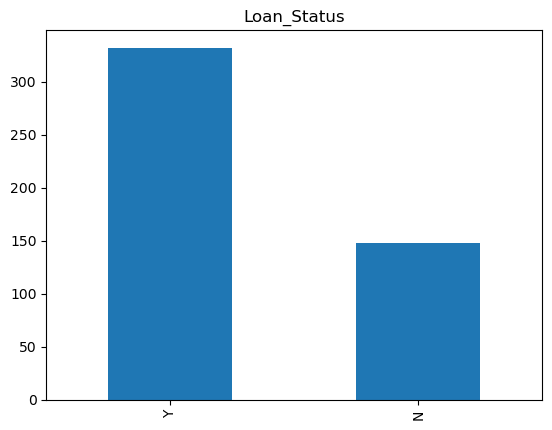

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64


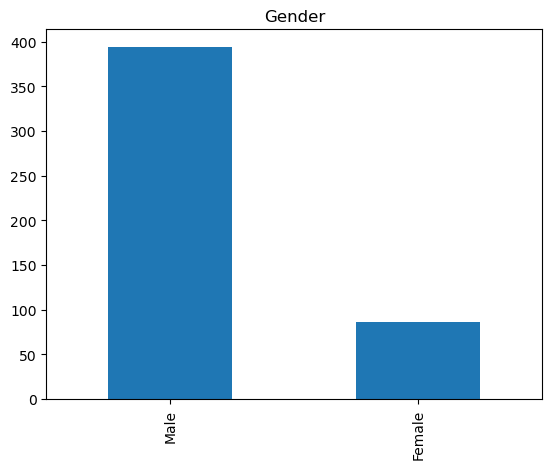

Male      0.820833
Female    0.179167
Name: Gender, dtype: float64


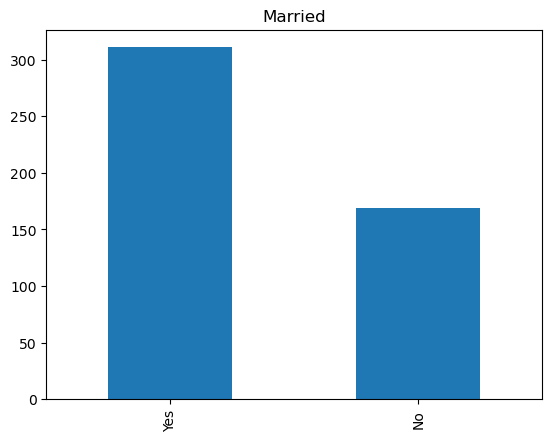

Yes    0.647917
No     0.352083
Name: Married, dtype: float64


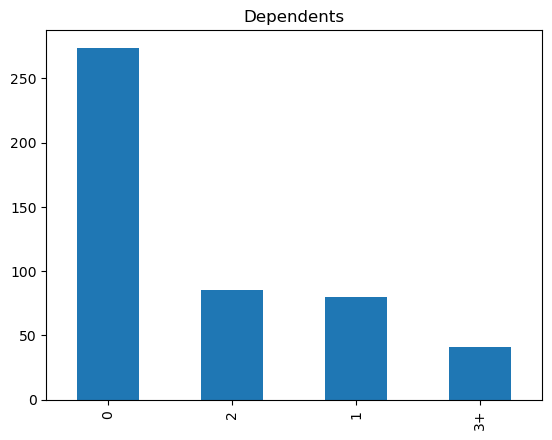

0     0.570833
2     0.177083
1     0.166667
3+    0.085417
Name: Dependents, dtype: float64


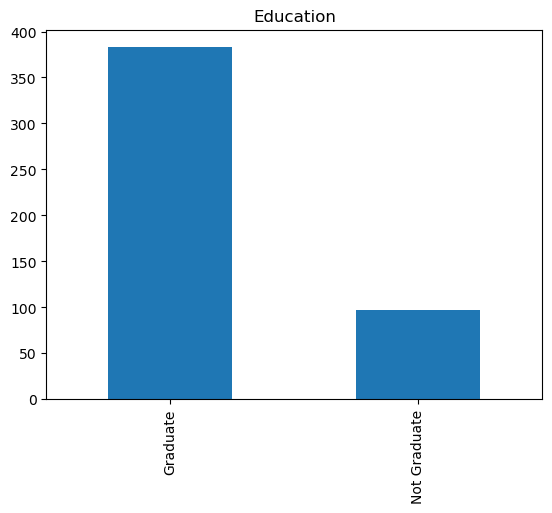

Graduate        0.797917
Not Graduate    0.202083
Name: Education, dtype: float64


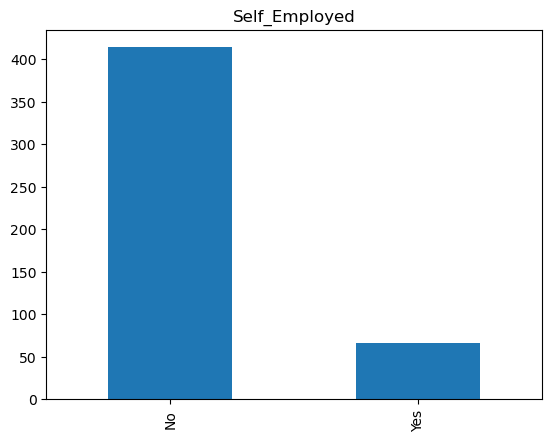

No     0.8625
Yes    0.1375
Name: Self_Employed, dtype: float64


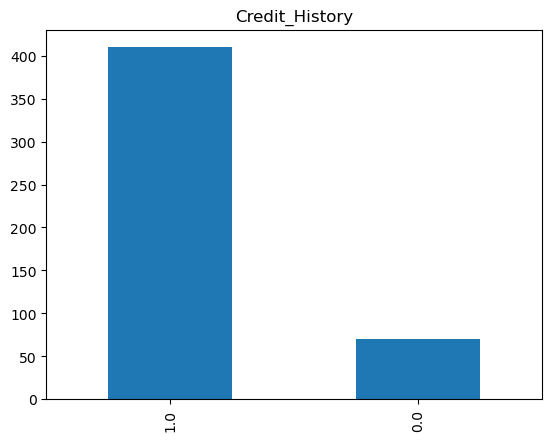

1.0    0.854167
0.0    0.145833
Name: Credit_History, dtype: float64


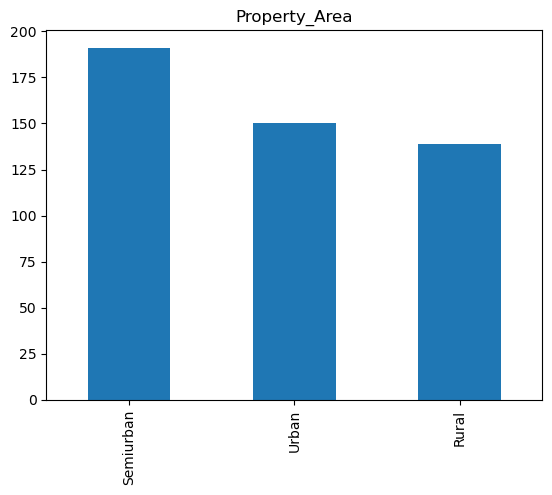

Semiurban    0.397917
Urban        0.312500
Rural        0.289583
Name: Property_Area, dtype: float64


In [5]:
# We take a first look at the repartition of the non-numerical values
non_num_cols = ["Loan_Status", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

for i in non_num_cols:
    loan[i].value_counts().plot.bar()
    plt.title(str(i))
    plt.show()
    print(loan[i].value_counts(normalize = 'index'))

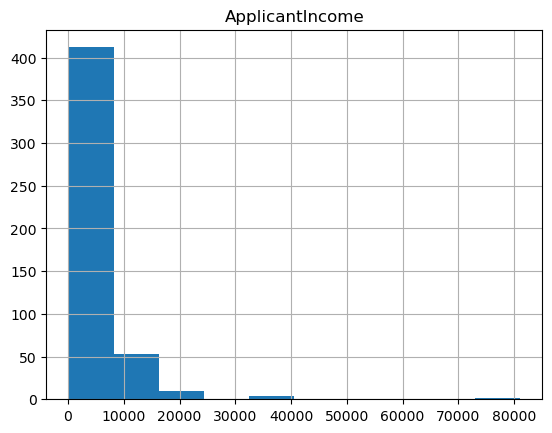

mean : 5364.23125
standard deviation : 5662.343743857911
skewness : 6.917026514199138


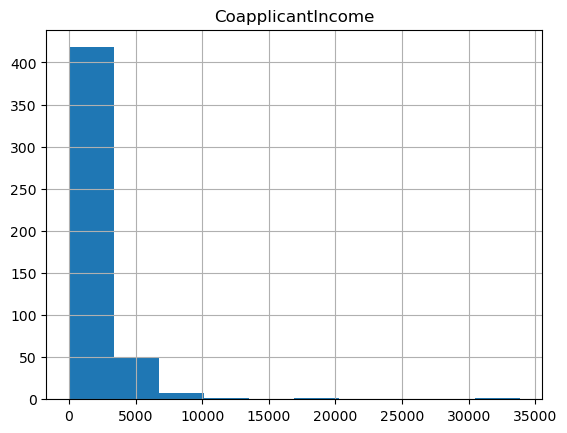

mean : 1581.0935833096667
standard deviation : 2614.9640824742264
skewness : 5.881622127841592


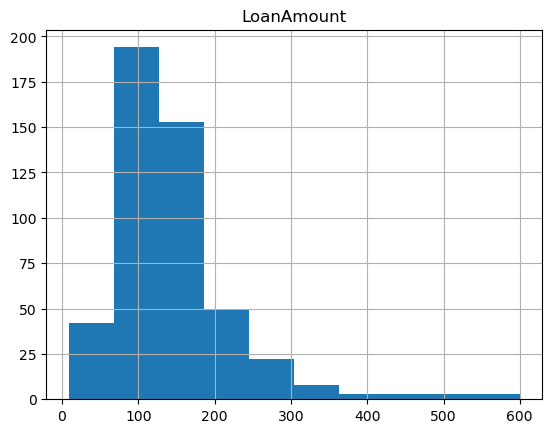

mean : 144.73541666666668
standard deviation : 80.42425781851965
skewness : 2.3614368477871213


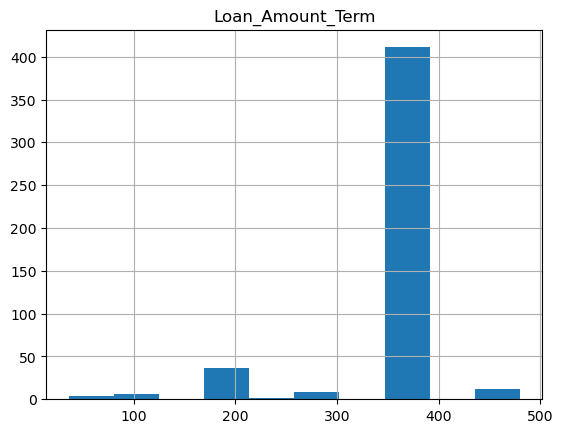

mean : 342.05
standard deviation : 65.14443567949569
skewness : -2.333710422255636


In [6]:
# Now numarical values. We check the repartition with histograms
numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for i in numerical_cols:
    loan[i].hist()
    plt.title(str(i))
    plt.show()
    print("mean : " + str(np.mean(loan[i])))
    print("standard deviation : " + str(np.std(loan[i])))
    print("skewness : " + str(loan[i].skew()))
    

We can see in the results that the dataset is greatly unbalanced
As the repartition in the target variable "Loan_Status" is greatly biased in favor of the acceptance of the loan
The distribution being unbalanced toward accepted loans, male, married, dependent, graduated, not self employed, with a good credit history, taking a 30 year long loan.
Even though we could expect these profiles to be more valued in the obtention of a loan in a real life setting. This unbalanced dataset might exacerbate these preferences for our AI.

Outside of the previously mentioned features,
Property_Area, ApplicantIncome, CoapplicantIncome and LoanAmount don't seem to be dramatically unbalanced. The numerical values showing close to zero skewness values. Wich indicates that the probability distributions of these features are roughly symetrical.
Wich is good since, many parametric statistical models assume normality or symmetrical distributions. Low skewness enhances the validity and reliability of these models, leading to more accurate estimates.


However, our dataset being imbalanced (the target variable in particular) could cause an issue to build a robust AI model. 
We might need to use some Resampling Techniques:
Undersampling: Randomly remove samples from the majority class.
Oversampling: Duplicate or generate new samples for the minority class.
Or weight the classes to give more importance to the minority class (refusal of loan for instance).

Here, we have an example about how we could balance out the distribution of our target variable by oversampling the minority class of said variable.

In [7]:
# Separate the minority and majority classes
minority_class = loan[loan['Loan_Status'] == 'N']
majority_class = loan[loan['Loan_Status'] == 'Y']

# Determine the ratio needed for oversampling
oversample_ratio = len(majority_class) // len(minority_class)

# Oversample the minority class
oversampled_minority = pd.concat([minority_class] * oversample_ratio, ignore_index=True)

# Concatenate the oversampled minority class with the majority class
loan_resampled = pd.concat([majority_class, oversampled_minority], ignore_index=True)

# Shuffle the DataFrame to randomize the order of samples
loan_resampled = loan_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
loan_resampled.count()

Gender               628
Married              628
Dependents           628
Education            628
Self_Employed        628
ApplicantIncome      628
CoapplicantIncome    628
LoanAmount           628
Loan_Amount_Term     628
Credit_History       628
Property_Area        628
Loan_Status          628
dtype: int64

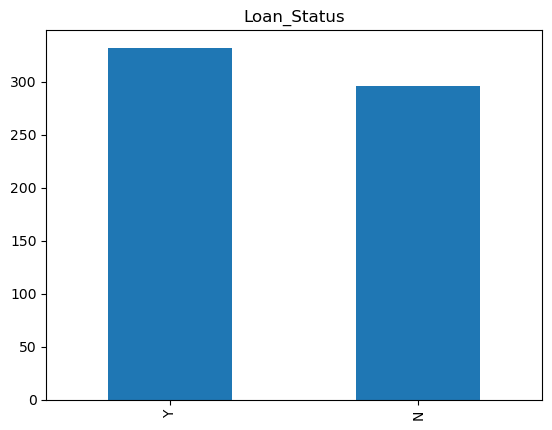

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64


In [9]:
loan_resampled['Loan_Status'].value_counts().plot.bar()
plt.title(str('Loan_Status'))
plt.show()
print(loan['Loan_Status'].value_counts(normalize = 'index'))

B - Between features correlations

Here, we look into the possible correlations between the different features of our dataset.

Pearson Correlation Matrix:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.010838       -0.056152  
CoapplicantIncome         -0.005775       -0.008692  
LoanAmount                 0.050867       -0.040773  
Loan_Amount_Term           1.000000        0.032937  
Credit_History             0.032937        1.000000  


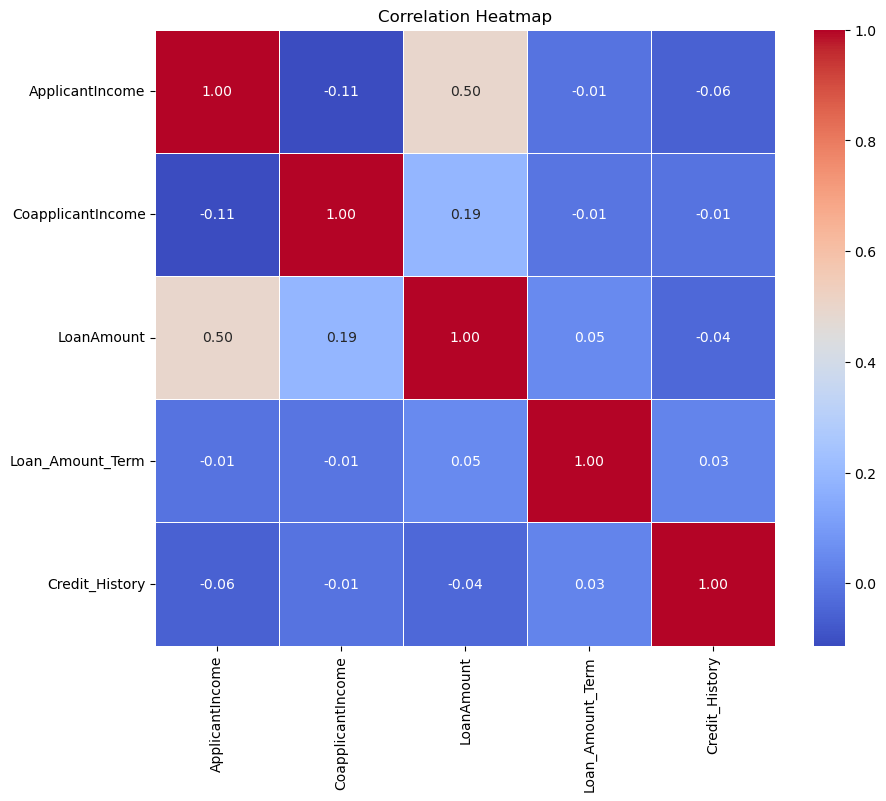

In [10]:
correlation_matrix = loan.corr()

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Using Pearson correlation, we find the shown above correlation matrix & visual heatmap.
They shows us that the numerical features have no correlation between them with the exeption of the LoanAmount feature that strongly correlate with the ApplicantIncome (0.50) as well as a lesser correlation with CoapplicantIncome (0.19).
We can furter show this correlation simply by making the sum of ApplicantIncome and CoapplicantIncome in Total_Income and comparing it to the LoanAmount. This way we find a correlation of 0.62.

In [11]:
loan["Total_Income"] = loan["ApplicantIncome"] + loan["CoapplicantIncome"]
correlation_matrix = loan.corr()
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
Total_Income              0.900097           0.331580    0.553914   

                   Loan_Amount_Term  Credit_History  Total_Income  
ApplicantIncome           -0.010838       -0.056152      0.900097  
CoapplicantIncome         -0.005775       -0.008692      0.331580  
LoanAmount                 0.050867       -0.040773      0.553914  
Loan_Amount_Term           1.000000        0.032937     -0.012822  
Credit_History             0.032937        1.000000     -0.057126  
Total_Income              -0.012822       -0.057126      1.000000  


C:\Users\ilian\AppData\Local\Temp\ipykernel_696\1318119062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan["Total_Income"] = loan["ApplicantIncome"] + loan["CoapplicantIncome"]


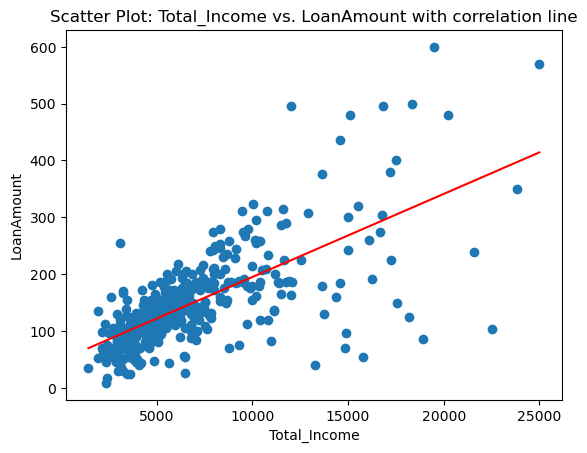

In [13]:
# After removing outlier values, We find the following scatter plot, we add the correlation line

result_df = loan[loan['Total_Income'] < 30000][['Total_Income', 'LoanAmount']]

x = result_df['Total_Income']
y = result_df['LoanAmount']
correlation_coefficient = np.corrcoef(x, y)[0, 1]

plt.scatter(x, y, label='Data Points')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red', label=f'Correlation Line (r = {correlation_coefficient:.2f})')

plt.title('Scatter Plot: Total_Income vs. LoanAmount with correlation line')
plt.xlabel('Total_Income')
plt.ylabel('LoanAmount')

plt.show()

For the next part we look for correlations between our features and the Target variable, Loan_Status.

We'll start by visualizing the proportion agreement (accuracy). Simply by counting the proportion of pairs for which the values are equal between the nominal values and Loan_Status.
Comparing the counted amounts using bar charts, will allow us to better visualize the differences or similarities in the agreement between the nominal features and Loan_Status. This will provide insights into the distribution and contribute to a more comprehensive understanding of the relationship between the predictor variable and the target variable.

After that we'll do some statistical tests.
Since our features are of different type (numerical & nominal), LoanAmount being nominal, we'll use different kind of tests to determine the corresponding p-values (Kruskal-Wallis for numerical vs nominal;chi square test for nominal vs nominal).
If we take 0.05 as a significant treshold for the p-values, if the p-values go below that treshold, we can reject the null hypothesis and conclude that there are significant differences between the features.

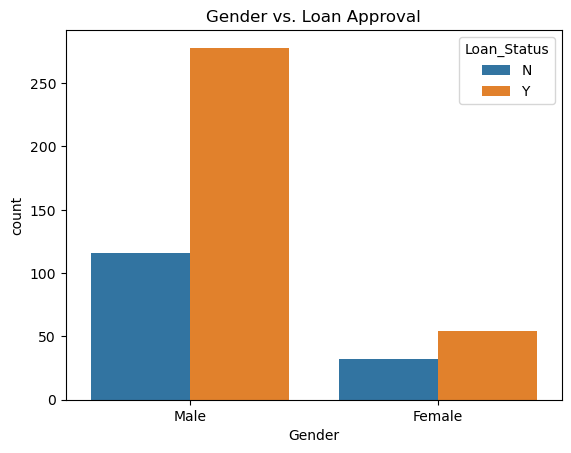

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


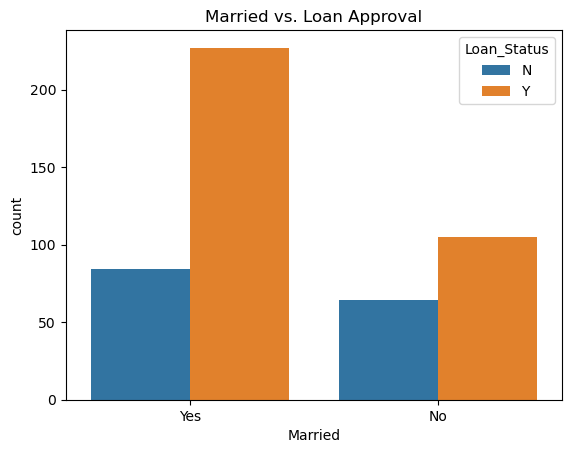

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


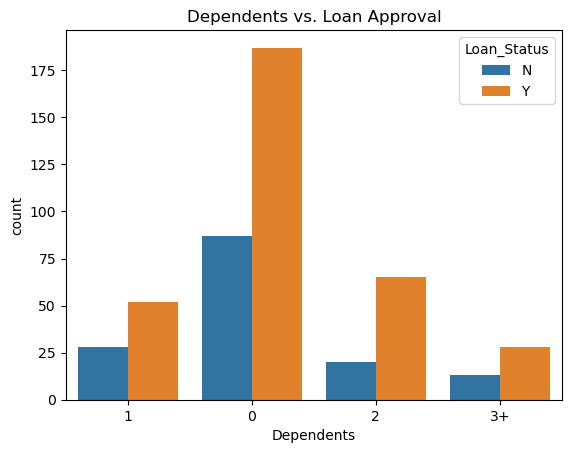

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28


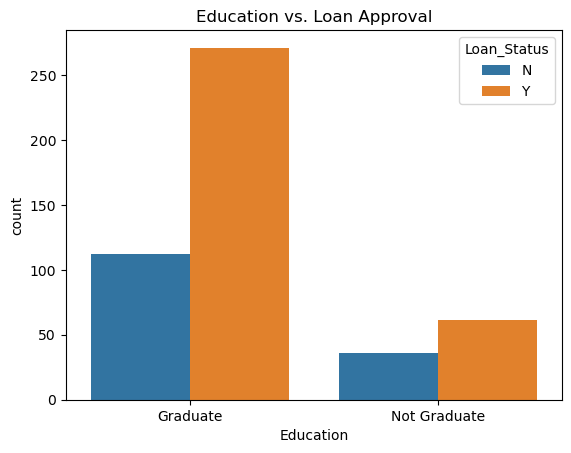

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


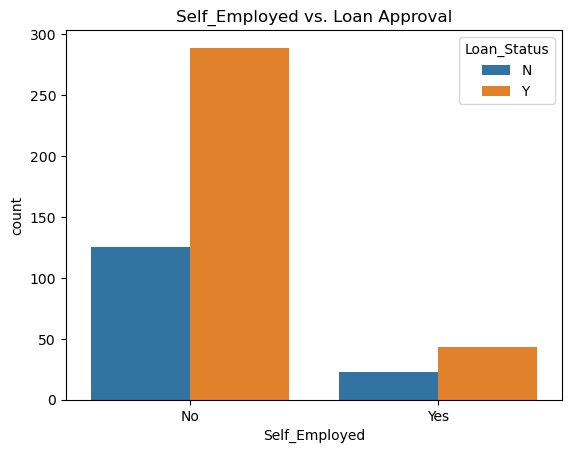

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43


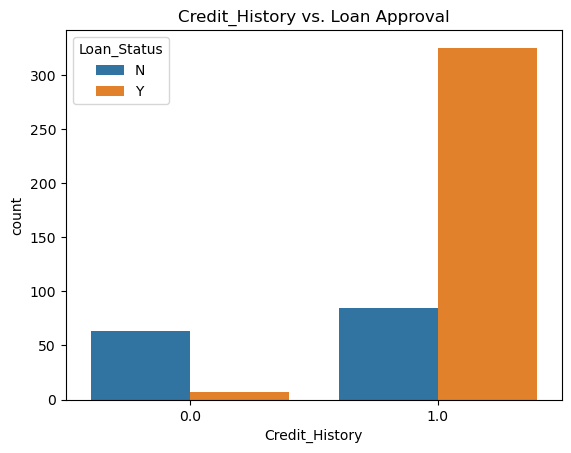

Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325


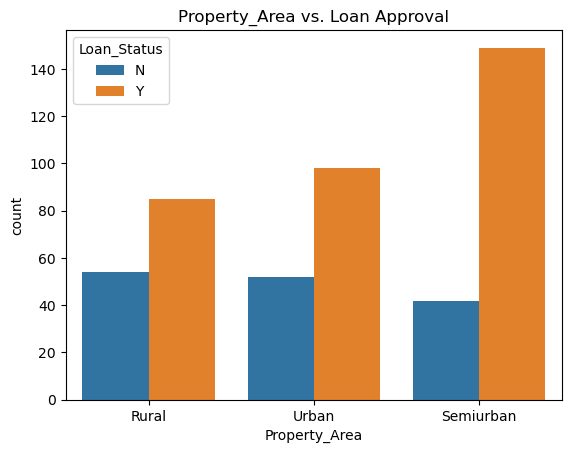

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


In [22]:
# Bar charts of the nominal values with Loan Status
for i in non_num_cols:
    sns.countplot(x=i, hue='Loan_Status', data=loan)
    plt.title(f'{i} vs. Loan Approval')
    plt.show()
    value_counts = loan.groupby([f'{i}', 'Loan_Status']).size().unstack()
    print(value_counts)

Looking at the barplots, we find uneven distributions between the nominal features and the target variable. These Distributions where to be expected regarding the first observation made in II-A.
The most noticeable distribution difference with Loan_Status being with the CreditHistory feature.
This difference being even more noticeable when we compare the previous barplots with the ones from the resampled dataset. As the other feature distributions get more uniform, CreditHistory remain as a major deciding factor for Loan Approval.

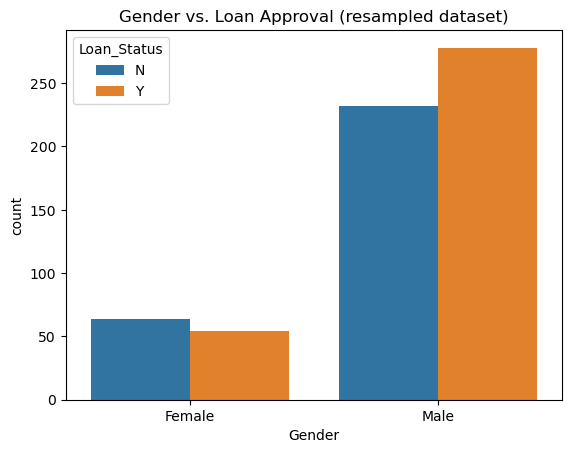

Loan_Status    N    Y
Gender               
Female        32   54
Male         116  278


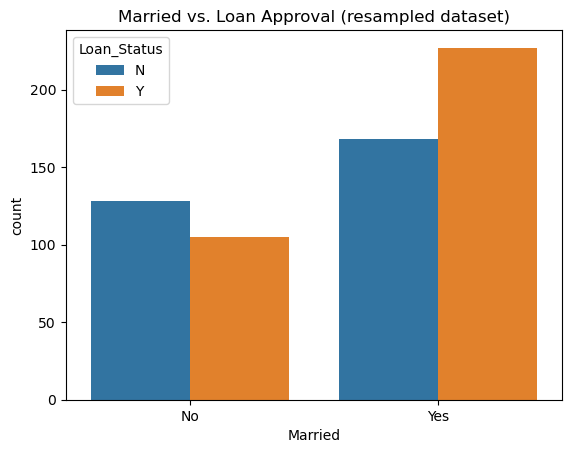

Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


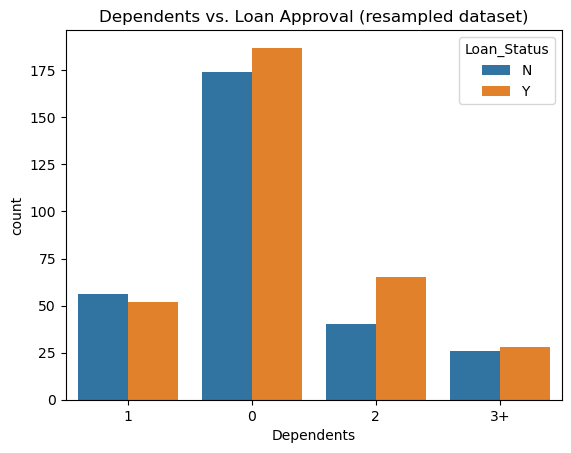

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28


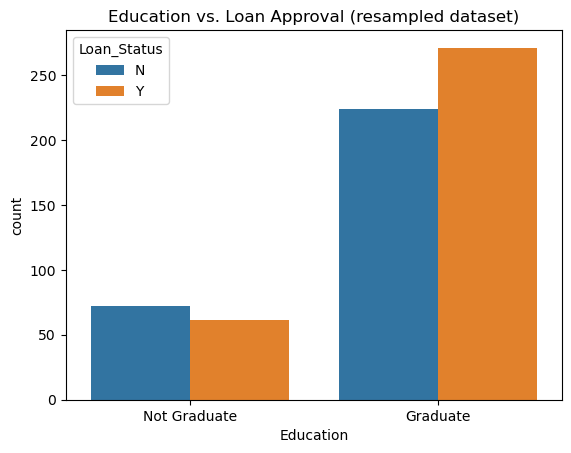

Loan_Status     N    Y
Education             
Graduate      112  271
Not Graduate   36   61


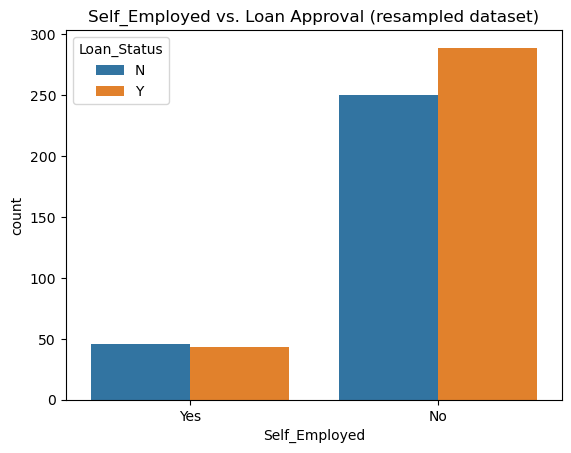

Loan_Status      N    Y
Self_Employed          
No             125  289
Yes             23   43


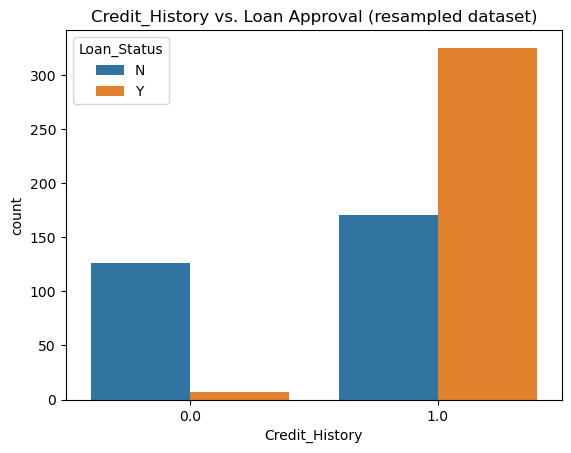

Loan_Status      N    Y
Credit_History         
0.0             63    7
1.0             85  325


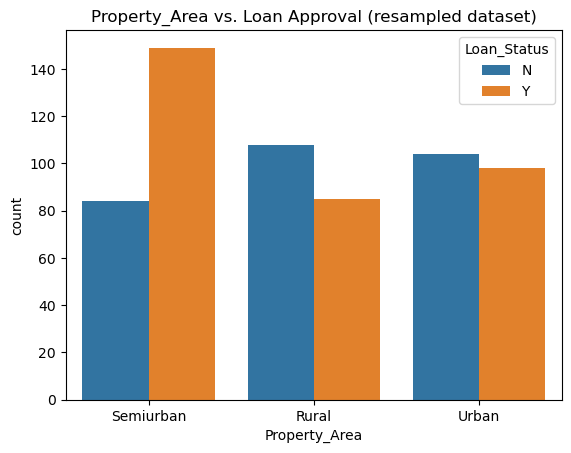

Loan_Status     N    Y
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98


In [27]:
# Bar charts of the nominal values with Loan Status (resampled dataset)
for i in non_num_cols:
    sns.countplot(x=i, hue='Loan_Status', data=loan_resampled)
    plt.title(f'{i} vs. Loan Approval (resampled dataset)')
    plt.show()
    value_counts = loan.groupby([f'{i}', 'Loan_Status']).size().unstack()
    print(value_counts)

In [28]:
from scipy.stats import kruskal, chi2_contingency

numerical_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
non_num_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

# Separate data into groups based on 'LoanStatus'
grouped_data_num = [loan[num_col][loan['Loan_Status'] == status] for status in loan['Loan_Status'].unique() for num_col in numerical_cols]
grouped_data_nom = [loan[nom_col][loan['Loan_Status'] == status] for status in loan['Loan_Status'].unique() for nom_col in non_num_cols]

# Perform Kruskal-Wallis test for numerical features
for num_col in numerical_cols:
    statistic_num, p_value_num = kruskal(*grouped_data_num)
    print(f"Kruskal-Wallis Test for {num_col}/Loan_Status:")
    if p_value_num < 0.05:
        print("There are significant differences.\n")
    else:
        print("No significant differences.\n")

# Perform Chi-Square test for nominal features
for nom_col in non_num_cols:
    contingency_table = pd.crosstab(loan[nom_col], loan['Loan_Status'])
    chi2_stat, p_value_chi2, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {nom_col}/Loan_Status:")
    if p_value_chi2 < 0.05:
        print("There is a significant association.\n")
    else:
        print("No significant association.\n")

Kruskal-Wallis Test for ApplicantIncome/Loan_Status:
There are significant differences.

Kruskal-Wallis Test for CoapplicantIncome/Loan_Status:
There are significant differences.

Kruskal-Wallis Test for LoanAmount/Loan_Status:
There are significant differences.

Kruskal-Wallis Test for Loan_Amount_Term/Loan_Status:
There are significant differences.

Chi-Square Test for Gender/Loan_Status:
No significant association.

Chi-Square Test for Married/Loan_Status:
There is a significant association.

Chi-Square Test for Dependents/Loan_Status:
No significant association.

Chi-Square Test for Education/Loan_Status:
No significant association.

Chi-Square Test for Self_Employed/Loan_Status:
No significant association.

Chi-Square Test for Credit_History/Loan_Status:
There is a significant association.

Chi-Square Test for Property_Area/Loan_Status:
There is a significant association.



Running these statistical tests, we find significant association between Loan_Status and the following features:
Married, Credit_History and Property_Area.
Consequently we can expect our AI model to give more weigth to these values.

III - Quick Summary

Using a correlation matrix on the numerical features, we found a strong correlation between the income of the applicant and the loan amount. 
With a lesser correlation with the coapplicant's income.

Upon inspecting the barplots, it becomes evident that there are notable disparities in the distributions between the nominal features and the target variable. The most notable one being the Influence of Credit_History in Loan approval.
A significant association found again with statistical tests. As well as a an association to a lesser degree (see resampled barplots) with two other features: being Married and the property area.